In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./men.csv")

In [3]:
df.head()

,tab_code,表章項目,cat01_code,品目分類（2020年改定）,cat02_code,世帯区分,area_code,地域区分,time_code,時間軸（月次）,unit,value
0,2,数量,10130050,135 カップ麺,3,二人以上の世帯（2000年〜）,0,全国,2015000101,2015年1月,1g,258
1,2,数量,10130050,135 カップ麺,3,二人以上の世帯（2000年〜）,0,全国,2015000202,2015年2月,1g,257
2,2,数量,10130050,135 カップ麺,3,二人以上の世帯（2000年〜）,0,全国,2015000303,2015年3月,1g,277
3,2,数量,10130050,135 カップ麺,3,二人以上の世帯（2000年〜）,0,全国,2015000404,2015年4月,1g,263
4,2,数量,10130050,135 カップ麺,3,二人以上の世帯（2000年〜）,0,全国,2015000505,2015年5月,1g,227


In [4]:
df = df[['cat01_code', 'time_code', 'value']]

In [9]:
df['time_code'] = df['time_code'].astype('str')

In [10]:
df_cup = df[df['cat01_code'] == 10130050]

In [11]:
df_inst = df[df['cat01_code'] == 10130060]

In [7]:
def make_str(data):
    y = data[:4]
    m = data[6:8]
    ans = y + '-' + m +'-1'
    return ans

In [61]:
import datetime

In [16]:
df_cup['date'] = df_cup['time_code'].apply(make_str)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_inst['date'] = df_inst['time_code'].apply(make_str)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 72 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cat01_code  72 non-null     int64 
 1   time_code   72 non-null     object
 2   value       72 non-null     int64 
 3   date        72 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.8+ KB


In [14]:
df_cup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cat01_code  72 non-null     int64 
 1   time_code   72 non-null     object
 2   value       72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


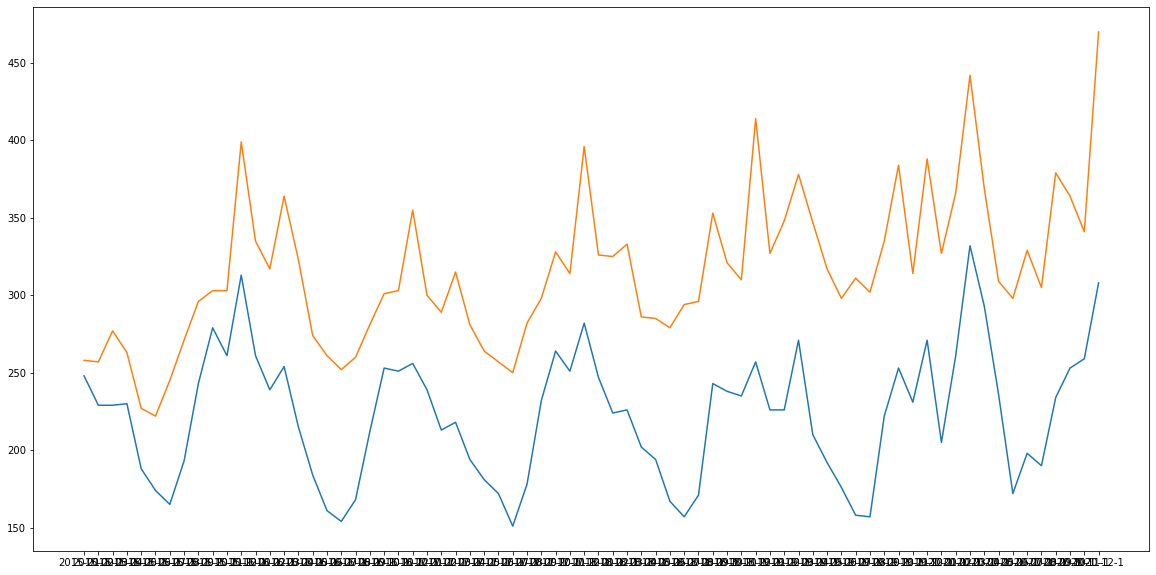

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df_inst['date'], df_inst['value'])
plt.plot(df_cup['date'], df_cup['value'])

In [19]:
df_inst.to_json('inst.json')

In [20]:
df_cup.to_json('cup.json')